In [1]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

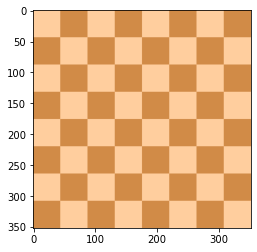

In [2]:
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

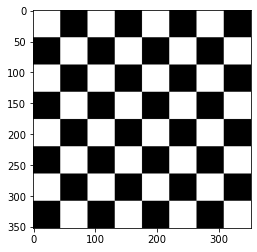

In [3]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

# Corners : Gradients changing in both directions
**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

In [15]:
gray = np.float32(gray_flat_chess)

dst = cv2.cornerHarris(gray,blockSize = 2,ksize = 3, k = 0.04)
output = cv2.dilate(dst,None)

flat_chess[dst > 0.01*dst.max()] = [255,0,0]

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown

In [16]:
dst.max()

1875781.2

In [17]:
output.max()

1875781.2

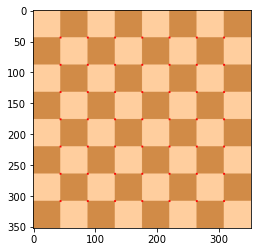

In [18]:
plt.imshow(flat_chess)

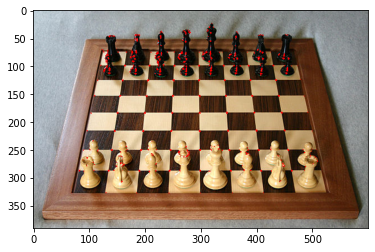

In [24]:
real_chess = cv2.imread('./DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)


gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(gray,blockSize = 2,ksize = 3, k = 0.04)
output = cv2.dilate(dst,None)

real_chess[dst > 0.01*dst.max()] = [255,0,0]

plt.imshow(real_chess)
# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown

In [26]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

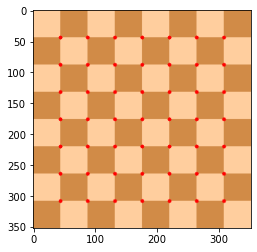

In [34]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

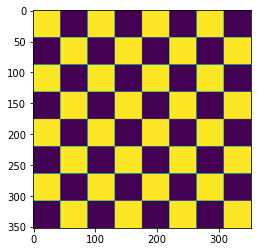

In [31]:
plt.imshow(gray_flat_chess)

array([308, 308], dtype=int64)